

```
`# This is formatted as code`
```

# The Problem

The [Swap test](https://en.wikipedia.org/wiki/Swap_test) is a simple quantum circuit which, given two states, allows to compute how much do they differ from each other.

1. Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

2. Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

3. Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. For example, the state
|a> = |01>
Is a product state, while the state
|b> = |00> + |11>
Is not.

Perform a qubit by qubit SWAP test to reconstruct the state. This part of the problem can be solved via a simple grid search.


# Section 1: The preambles
Before running over the solution which is in subsequent section. Let's go through preambles.

## Subsection 1.1: Qubit
A qubit is a two-state system that can be realized in a state of superposition composed by two orthonormal basis states of $|0\rangle$ and $|1\rangle$. Expressed as following.

\begin{align*}
|\Psi\rangle = \alpha|0\rangle + \beta|1\rangle \\
\end{align*}
Here, $\alpha$ and $\beta$ are the probability amplitudes along with the two basis states respectively. Whose square of norms are the probabilities for the qubit to collapse over the same. Following the normalization of the qubit $|\Psi\rangle$.

\begin{align*}
|\alpha|^2 + |\beta|^2 = 1
\end{align*}

## Subsection 1.2: Bloch sphere
Bloch Sphere is a unit sphere. The radius of the sphere equals to the total probability of the residing qubit. All the points on its surface are traced by the vector representation of the qubit. The convention is to associate the positive z-axis to $|0\rangle$ and the other one to $|1\rangle$. This puts an angle of $\pi$ between these two orthonormal states. Immediately, it seems to be a counterintuitive approach. However, together with all of these cases, the idea of probability amplitudes ($\alpha$ and $\beta$) are expressible in polar coordinates makes us ready to choose the Hopf coordinates for the representation of the Bloch Sphere as illustrated below.

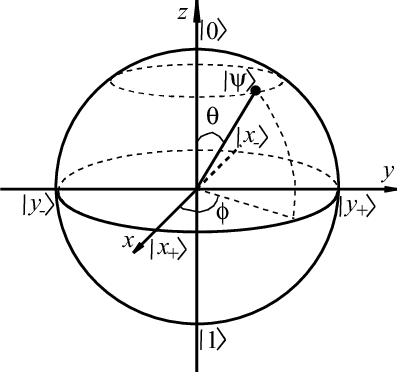

Source: Cong, Shuang. (2008). The analysis of two-level Quantum system states and control in the Bloch ball. 618-622. 10.1109/CHICC.2008.4604907.

In the desired co-ordinate, $\theta$ is called polar angle and $\phi$ is called azimuthal angle with range $0 ≤ \theta ≤ \pi$ and $0 ≤ \phi < 2\pi$ The probability amplitude for the two basis state of the qubit becomes: 

\begin{align*}
\alpha & = cos(\frac{\theta}{2})e^{i\phi_{1}} \\
\beta & = sin(\frac{\theta}{2})e^{i\phi_{2}} \\
\end{align*}

\begin{align*}
\alpha^{2} + \beta^{2} = 1 
\end{align*}

Consequently, the qubit takes the form as shown below.

\begin{align*}
|\Psi\rangle & = cos(\frac{\theta}{2})e^{i\phi_{1}}|0\rangle + sin(\frac{\theta}{2})e^{i\phi_{2}}|1\rangle \\
|\Psi\rangle & = e^{i\phi_{1}} (cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i(\phi_{2}- \phi_{1})}|1\rangle)
\end{align*}

We can arbitarily choose $e^{i\phi_{1}}$ to be equal to 1 and take $e^{i(\phi_{1} - \phi_{1})} = e^{i\phi}$. Eventually the qubit finalizes to following form.

\begin{align*}
|\Psi\rangle & = cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i\phi}|1\rangle \\
\end{align*}

**Aliter:**

The basis state $|0\rangle$ might not be confined as parallel or anti-parallel to the x-axis. In such a case, the value of $e^{i\phi_{1}}$ is not equal to 1. The azimuthal angle $\phi_{1}$ can be replaced by $\phi$. So that the other one can be expressed with a phase denoted by $\lambda$ so, $\phi_{2}$ = $\phi + \lambda$. Hence the qubit takes the form as shown below.  

\begin{align*}
|\Psi\rangle & = cos(\frac{\theta}{2})e^{i\phi}|0\rangle + sin(\frac{\theta}{2})e^{i(\phi + \lambda)}|1\rangle \\
\end{align*}

## Subsection 1.3: Hadamard gate
Hadamard gate (H-gate) performs a rotation operation on a single qubit thus it's termed as a single-qubit gate. The qubit, after rotation, moves away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. The probability for the qubit to collapse into either of the states is equal. The matrix form of H-gate:

\begin{align*}
H =\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \\
\end{align*}

\begin{align*}
H|0\rangle & = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) & =: |x_{+}\rangle \\
H|1\rangle & = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) & =: |x_{-}\rangle
\end{align*}

When H-gate is applied to $|0\rangle$ the resulting state is along the $|x_{+}\rangle$ axis and when applied to $|1\rangle$ it's along the $|x_{-}\rangle$ axis. If the H-gate is applied for the second time we observe an interesting result. It reverts the superposition into the state of origin. In simple expressions we write:

\begin{align*}
H|x_{+}\rangle & = |0\rangle \\
H|x_{-}\rangle & = |1\rangle
\end{align*}

## Subsection 1.4: SWAP gate
Unlike the H-gate, SWAP Gate is a multi-qubit gate. It acts upon the composite state of qubits. The composite state is achieved by the tensor product between two or more states. In the case of a composite state composed of two qubits, the gate swaps the position of two qubits. However, in the case of a composite state composed of three qubits the gate is now termed a controlled SWAP gate. We take the first qubit as a reference and swap the other two qubits only if the reference qubit is in $|1\rangle$ state.

For brevity, let's take two qubits spanning over the same vector space with basis vectors $|0\rangle$ & $|1\rangle$

\begin{align*}
|\Psi\rangle_{1} & = a_{1}|0\rangle + b_{1}|1\rangle \\
|\Psi\rangle_{2} & = a_{2}|0\rangle + b_{2}|1\rangle
\end{align*}

\begin{align*}
|\Psi\rangle_{1} \otimes |\Psi\rangle_{2} = a_{1}a_{2}|0\rangle|0\rangle + a_{1}b_{2}|0\rangle|1\rangle + b_{1}a_{2}|1\rangle|0\rangle + b_{1}b_{2}|1\rangle|1\rangle \\
\end{align*}

This expression is simplified as:

\begin{align*}
|\Psi\rangle_{1} \otimes |\Psi\rangle_{2} = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle \\
\end{align*}

The SWAP gate exchanges the two qubits. It transforms the basis vectors as
\begin{align*}
|00\rangle \rightarrow |00\rangle, \quad |01\rangle \rightarrow |10\rangle,\quad |10\rangle \rightarrow |01\rangle,\quad |11\rangle \rightarrow |11\rangle
\end{align*}

#Section 2: The tasks
Python would be the best choice to solve the problem due to the utilitarian packages it has for quantum computation. The python library "qiskit" suffices for the task at hand. 

In the chosen library, an initialized qubit is represented as:

\begin{align*}
|\Psi\rangle & = cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i\phi}|1\rangle \\
\end{align*}

However, we have ample freedom to rotate this vector (qubit) around the Bloch sphere by applying the general unitary operator U expressed as:

\begin{align*}
U = \begin{pmatrix}
cos(\frac{\theta}{2}) & -e^{-i\lambda}sin(\frac{\theta}{2}) \\
e^{-i\phi}sin(\frac{\theta}{2}) & e^{-i(\phi +\lambda)}cos(\frac{\theta}{2})
\end{pmatrix} \\
\end{align*}

This unitary operator performs a transformation over the vector $|\Psi\rangle$ resulting in its rotation within the Bloch sphere. The final form denoted by $|\Psi^{'}\rangle$ is expressed below. This state traces out the Bloch sphere

\begin{align*}
U|\Psi\rangle & = |\Psi^{'}\rangle \\
|\Psi^{'}\rangle & = e^{i\phi} (cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i(\phi + \lambda)}|1\rangle)
\end{align*}

## Subsection 2.1: Variational circuit
In the following code snippet we have built a circuit and defined the parameters. The cicuit comprises of 
*   a single qubit
*   two spherical parameters $\theta$ and $\phi$, and a phase $\lambda$ between the azimuthal angle of two basis state of the qubit



In [ ]:
# %pip install qiskit
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt 
import numpy as np

# Spherical Parameters
theta_param = Parameter("theta")
phi_param = Parameter("phi")
lambda_param = Parameter("lambda")

# Register a qubit
qubit = QuantumRegister(1)

# Initializate a circuit 
qc = QuantumCircuit()
qc.add_register(qubit)

The general unitary operator U can be applied to the circuit which will result in its rotation. This resulting rotation traces Bloch sphere. During the application of the operator the aforementioned parameters can be passed as its arguments.

In [ ]:
# General rotation operator is implanted in to the circuit.
qc.u3(theta_param, phi_param, lambda_param , qubit)

###Testing the parametric circuit
We will conceive three ways to verify our parametric circuit reproduces the Bloch sphere via the rotation operation. The first two will exploit the fact that the norm of the state representing the qubit should equal 1. For the last method, special cases of the state are produced and juxtapose with the particular geometric cases of the Bloch sphere.

### A. Brute force approach
In the first method, we can motivate ourselves by running the values for $\theta$ and $\phi$ from 0 to $\pi$ and 0 to $2\pi$ respectively and place a nested loop to retrieve the norm of the rotated qubit. In this brute force approach, the norm must equal 1 for all the instances of the parameters. Please note the value for the parameter $\lambda$ is arbitrarily set at 2.0 to eliminate one additional nested loop. 

To visualize the result, the norms collected during the loop is printed on the console. And the list of the norm is plotted against the list of natural numbers. The size of the list of natural numbers must equal total loop counts.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 0.999999999999

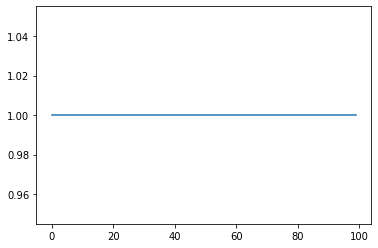

In [ ]:
# Simulator
backend = Aer.get_backend('statevector_simulator')

partition = 10
theta_range = np.linspace(0, np.pi, partition)
phi_range = np.linspace(0, 2*np.pi, partition)

norms = []
for theta in theta_range:
    for phi in phi_range:
        state = execute(qc.bind_parameters({theta_param: theta, phi_param: phi, lambda_param: 2.0}), backend).result()
        ket = state.get_statevector()
        norms.append(np.linalg.norm(ket))

# Visualization of  norms
print(norms)

plt.plot(range(0, partition**2), norms) 
plt.show()
#------------------------

###B. Randomly valued parameters
We will create random floating values for the three parameters and check whether the norm of the state equals 1 or not. We will make ten random cases of the parameters. For such a few cases a plot might not be necessary. Printing the list of the collected norm on the console suffices

In [ ]:
norms = []
for i in range(0, 10):
    theta_rand = np.pi*np.random.rand()
    phi_rand = 2*np.pi*np.random.rand()
    lambda_rand = 2*np.pi*np.random.rand()

    state = execute(qc.bind_parameters({theta_param: theta_rand, phi_param: phi_rand, lambda_param: lambda_rand}), backend).result()
    ket = state.get_statevector()
    norms.append(np.linalg.norm(ket))

print(norms)

[0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0]


###C. Special geometric cases
In a superposition state, the qubit is spread out over the Bloch sphere. However, there are few special geometric cases. 



* if we force the state to align along the z-axis then the probability for the qubit to collapse over $|0\rangle$ and $|1\rangle$ equals 1
* Similarly, when the state is resides on the great circle$^\dagger$ then the probability amplitudes of the both basis states becomes $\frac{1}{2}$.

By manipulating the parameters in our parametric circuit it's plausible to obtain the state at special geometric cases. The obtained state can be used to display the vector and calculate the desired probability which should replicate the geometric inferences.

$^\dagger$plane formed due to intersection of a plane and a sphere at its equator